In [3]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# high quality plots
plt.rcParams['figure.dpi'] = 300

### The small world regime

Using the implementation of the small-world network model in Lab 2, generate adjacency matrices for values of the rewiring probability p . Using np.logspace, make these values logarithmically spaced between $10^{-3}$ and 1 . Measure the clustering coefficient and average path length for each adjacency matrix you generate, using the implementations in Lab 2. Generate many realizations and measurements for each value of $p$, store the values for each network measure in an array, and then plot the values to replicate Figure 5 in Lab 2.

In [40]:
# function for generating Watts-Strogatz graph
def generate_watts_strogatz(N = 20, k = 4, p = 0.0):
  
  A = np.zeros((N,N))
  
  # generate ring graph
  for ii in range(N):
    for jj in [x for x in range(-k,k) if x != 0]:
        A[ii,np.mod(ii+jj,N)] = 1
  
  # randomize
  for ii in range(N):
    for jj in range(-k,k):
      if ( np.random.rand() < p ):
        
        A[ii,np.mod(ii+jj,N)] = 0
        A[np.mod(ii+jj,N),ii] = 0
  
        index_target = np.random.randint( 0, N )
        while ( A[index_target,ii] == 1 and index_target != ii ):
          index_target = np.random.randint( 0, N )
  
        A[index_target,ii] = 1
        A[ii,index_target] = 1

    # eliminate self-connections
    for ii in range(N):
      A[ii,ii] = 0
        
  return A

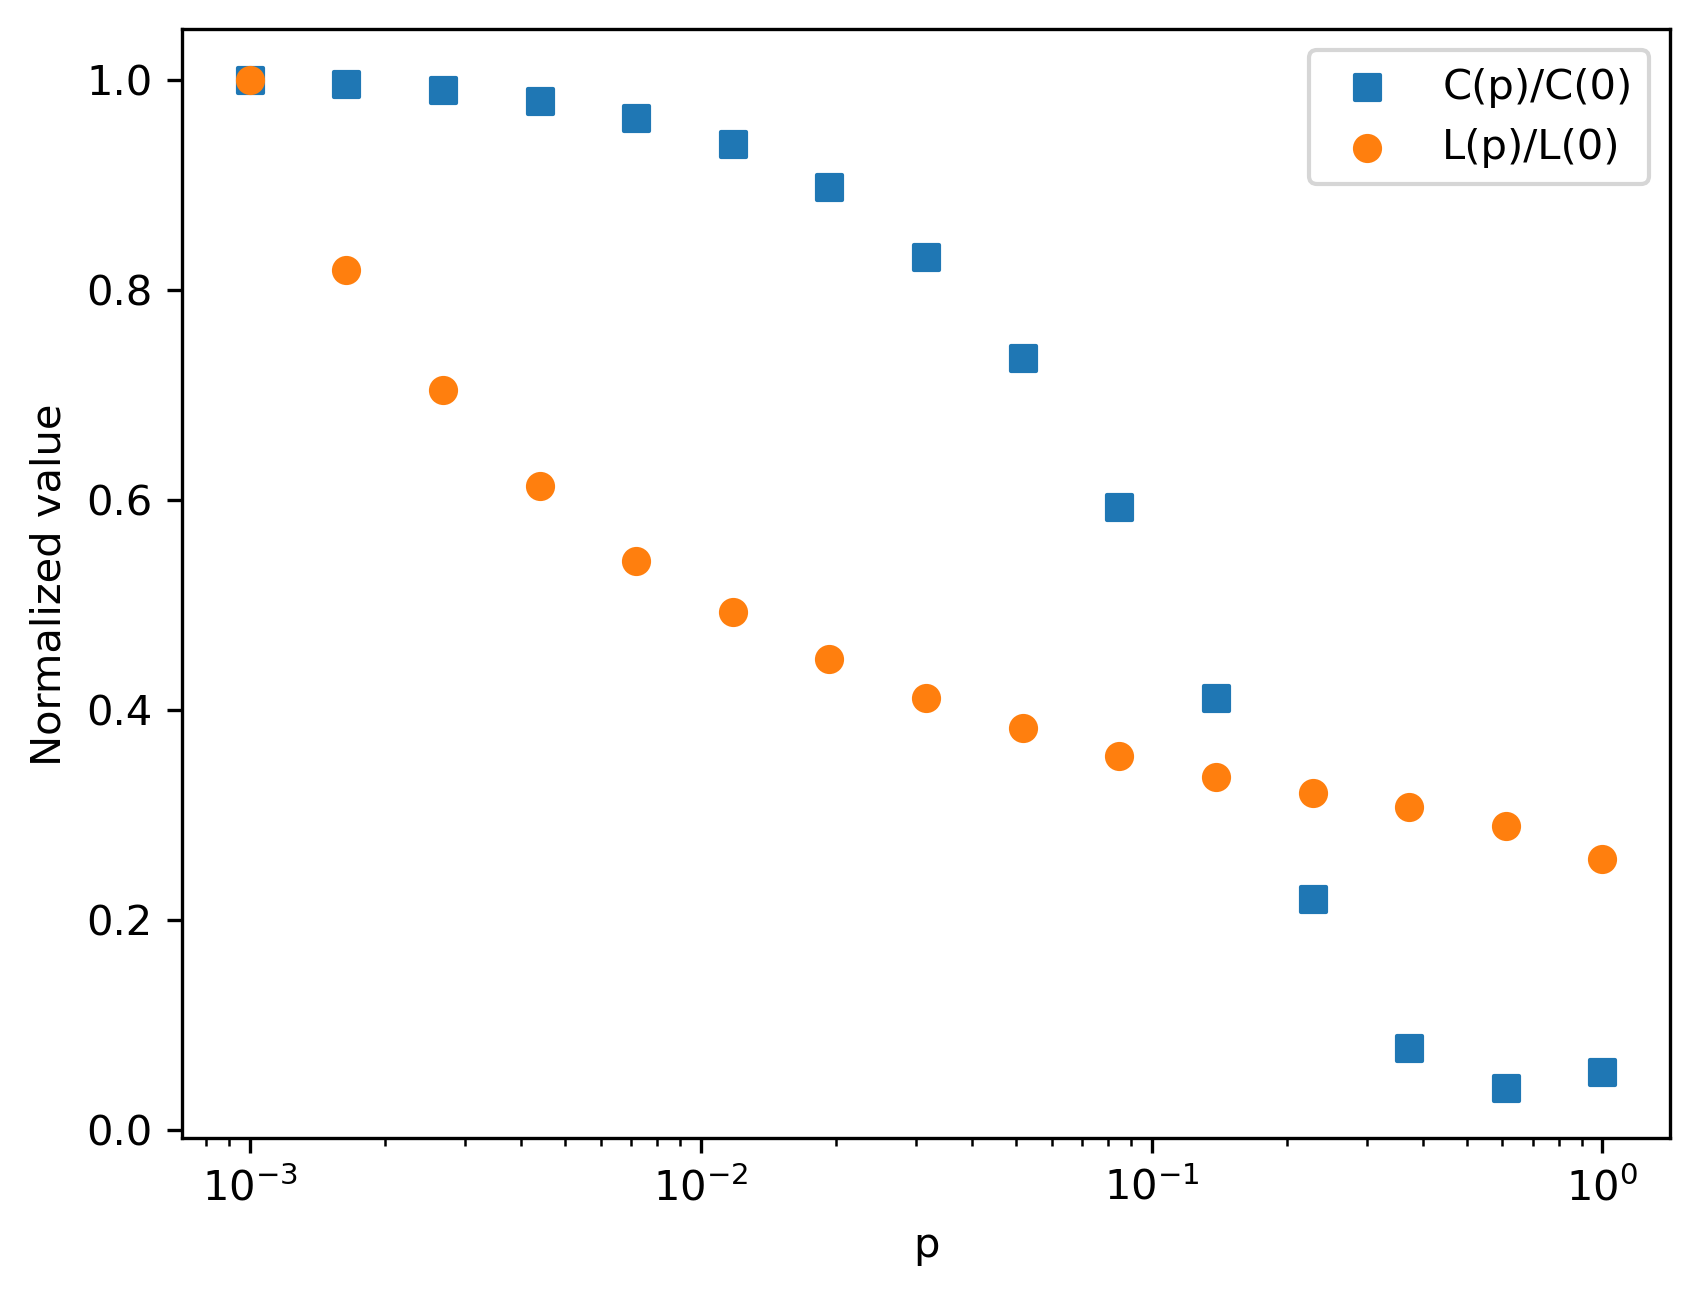

In [49]:
# logaritmically spaced values for p (between 10^-3 and 1)
p_values = np.logspace(-3,0,15)

# initialize arrays to store clustering coefficient and average shortest path length
C = np.zeros(len(p_values))
L = np.zeros(len(p_values))

# number of realizations for each p value
num_realizations = 20

# loop over p values, creating a Watts-Strogatz graph for each
for i in range(len(p_values)):

    # arrays for each set of realizations (= for each p value)
    clustering_coeffs = []
    path_lengths = []

    # multiple realizations for each p value
    for _ in range(num_realizations):
        
        A = generate_watts_strogatz(N=1000, k=10, p=p_values[i])
        
        # create a networkx graph object
        G = nx.from_numpy_array(A)

        # calculate clustering coefficient and average shortest path length
        clustering_coeffs.append(nx.average_clustering(G))
        path_lengths.append(nx.average_shortest_path_length(G))
    
    # store average values across realizations
    C[i] = np.mean(clustering_coeffs)
    L[i] = np.mean(path_lengths)
  
# normalize values
C = C / C[0]
L = L / L[0]

# plot
plt.figure()
plt.scatter(p_values,C, marker='s', label='C(p)/C(0)')
plt.scatter(p_values,L,label='L(p)/L(0)')
plt.xscale('log')
plt.xlabel('p')
plt.ylabel('Normalized value')
plt.legend()